#  Titanic EDA - Part 2
Steps invovled:
1. Defining X & Y
2. Splitting the data
3. Scaling the data
4. Models:
    1. Logistic Regression
    2. KNN - KNeighborsClassifier
    3. Decision Tree
    4. Random forest
5. K fold cross validation

#### KNN model has the best accuracy among all the models with 80.41% accuracy.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 


In [3]:
df=pd.read_csv('EDA Titanic.csv')#getting the data after eda

In [4]:
del df['Unnamed: 0']

In [5]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1.0,0.0,7.2500,1,0,1
1,1,1,38.0,1.0,0.0,56.4958,0,0,0
2,1,3,26.0,0.0,0.0,7.9250,0,0,1
3,1,1,35.0,1.0,0.0,53.1000,0,0,1
4,0,3,35.0,0.0,0.0,8.0500,1,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    float64
 4   Parch       891 non-null    float64
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    int64  
 7   Embarked_Q  891 non-null    int64  
 8   Embarked_S  891 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


In [7]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.494662,0.400673,0.239057,22.804680,0.647587,0.086420,0.725028
std,0.486592,0.836071,11.715182,0.637727,0.426747,18.056822,0.477990,0.281141,0.446751
min,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,54.000000,2.000000,1.000000,56.495800,1.000000,1.000000,1.000000


**DEFINING X & Y**

In [8]:
x=df.iloc[:,1:9].values
y=df.iloc[:,0].values

### Splitting the data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3 , random_state=0)

### **Scaling the data**

In [10]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [11]:
X_train.shape

(623, 8)

In [12]:
X_test.shape

(268, 8)

In [13]:
y_train.shape

(623,)

In [14]:
y_test.shape

(268,)

### 1. Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
y_pred = logReg.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[141  27]
 [ 27  73]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       168
           1       0.73      0.73      0.73       100

    accuracy                           0.80       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268

0.7985074626865671


### 2. KNN - KNeighborsClassifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(13)
knnmodel.fit(X_train, y_train)
y_pred_knn = knnmodel.predict(X_test)

print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))

[[144  24]
 [ 29  71]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       168
           1       0.75      0.71      0.73       100

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268

0.8022388059701493


In [19]:
error = []
accuracy = []
for i in range(1,40,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    accuracy.append(accuracy_score(y_test, pred_i))

Text(0, 0.5, 'Mean Error')

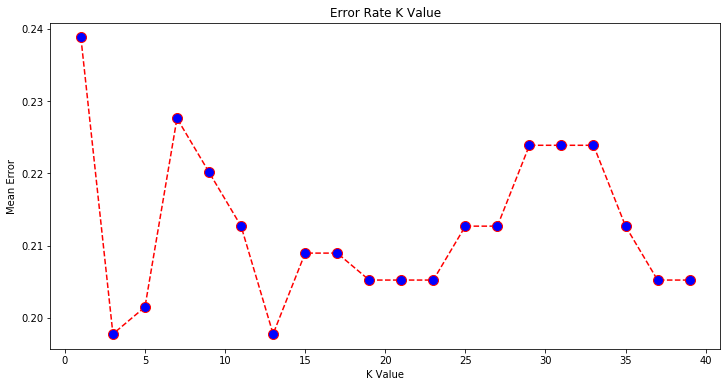

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,40,2), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Text(0, 0.5, 'Accuracy')

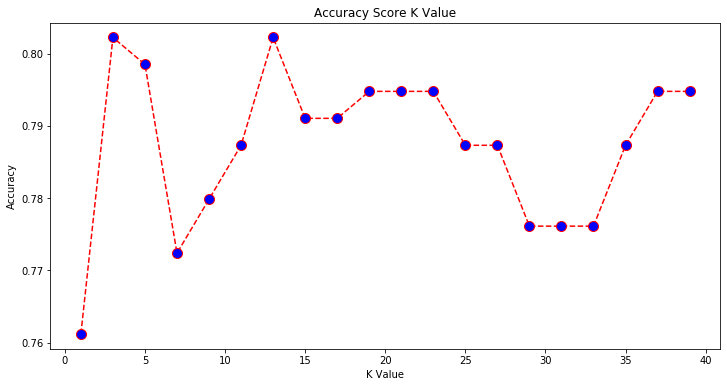

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,40,2), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Score K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

### 3. Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
decTree=DecisionTreeClassifier()
decTree.fit(X_train,y_train)
y_pred_tree=decTree.predict(X_test)

In [23]:
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
print(accuracy_score(y_test, y_pred_tree))

[[138  30]
 [ 29  71]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       168
           1       0.70      0.71      0.71       100

    accuracy                           0.78       268
   macro avg       0.76      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

0.7798507462686567


C:\Users\User\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


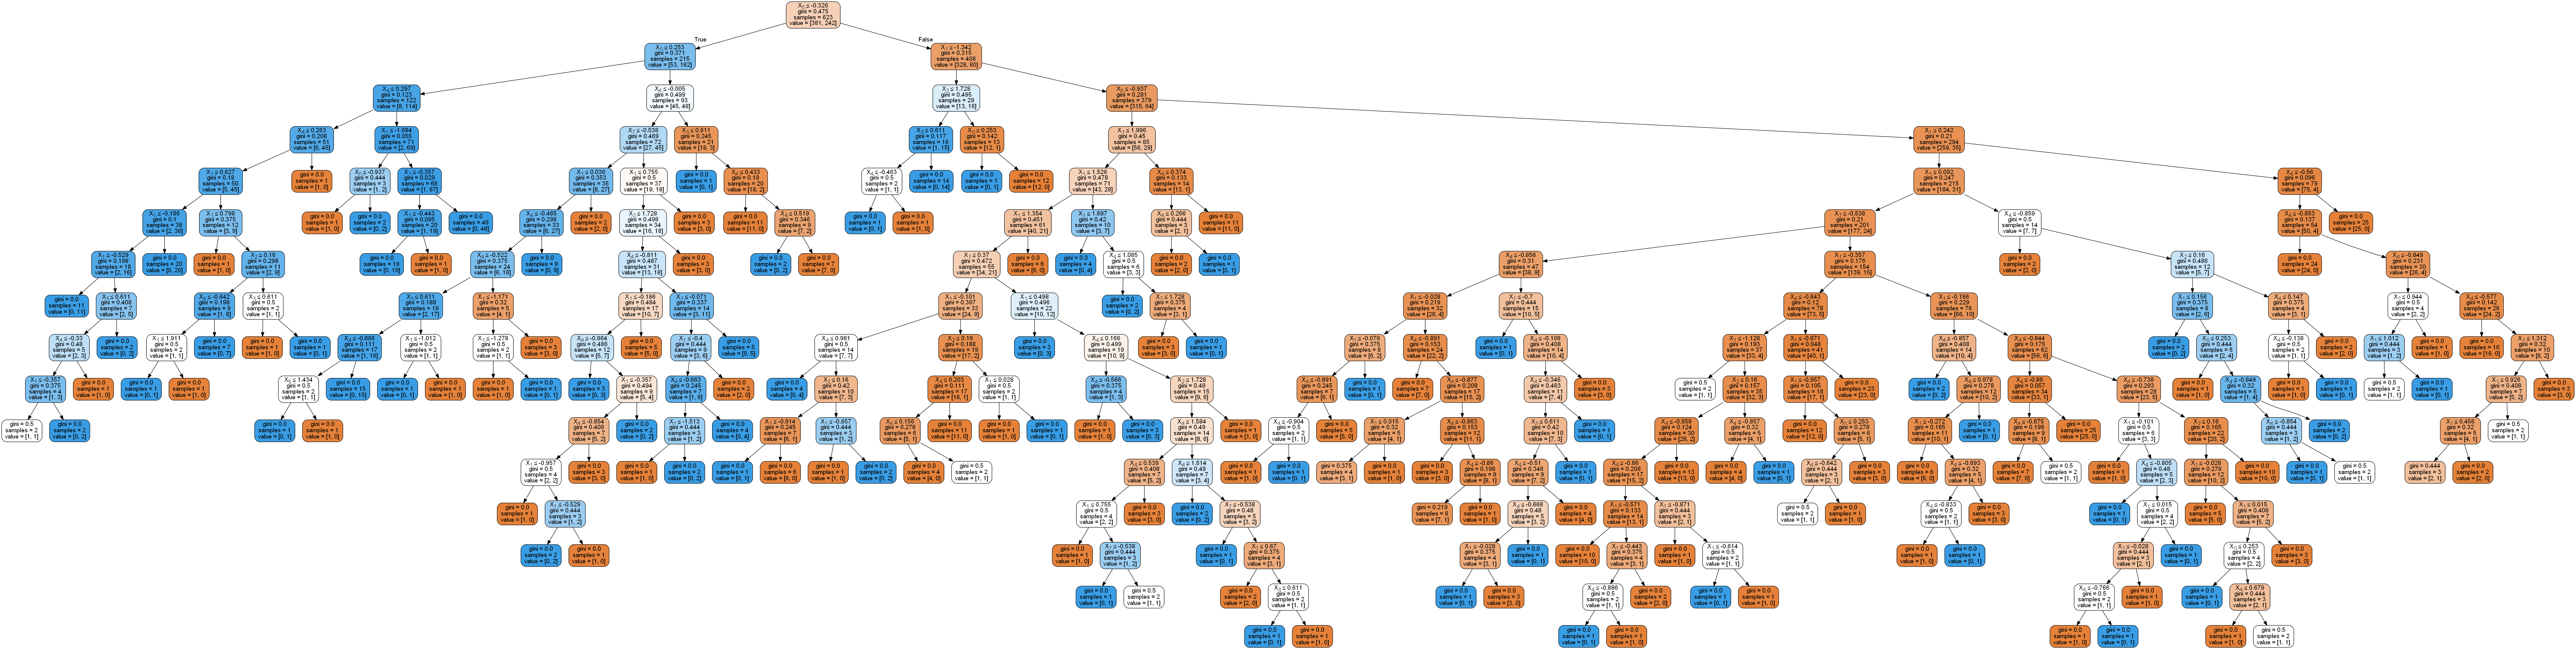

In [24]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz 
import pydotplus 
dot_data=StringIO() 
export_graphviz(decTree,out_file=dot_data,filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(),width=12000,height=12000)

### 4. Random forest

In [25]:
from sklearn.ensemble import RandomForestClassifier 
ranFor=RandomForestClassifier(n_estimators=40,n_jobs=2,random_state=0)
ranFor.fit(X_train,y_train)
y_pred_ranFor=ranFor.predict(X_test)

print(confusion_matrix(y_test, y_pred_ranFor))
print(classification_report(y_test, y_pred_ranFor))
print(accuracy_score(y_test, y_pred_ranFor))

[[146  22]
 [ 29  71]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       168
           1       0.76      0.71      0.74       100

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268

0.8097014925373134


## K fold cross validation

In [26]:
from sklearn.model_selection import cross_val_score


#### Logistic Regression

In [27]:
scores_logReg = cross_val_score(logReg, X_train, y_train, cv=10, scoring='accuracy')
print(scores_logReg)
print(scores_logReg.mean())

[0.74603175 0.80952381 0.80952381 0.77419355 0.79032258 0.79032258
 0.77419355 0.83870968 0.82258065 0.80645161]
0.7961853558627752


#### knn 

In [28]:
scores_knnmodel = cross_val_score(knnmodel, X_train, y_train, cv=10, scoring='accuracy')
print(scores_knnmodel)
print(scores_knnmodel.mean())

[0.82539683 0.82539683 0.74603175 0.79032258 0.80645161 0.79032258
 0.74193548 0.83870968 0.88709677 0.79032258]
0.8041986687147977


#### Decision Tree

In [29]:
scores_decTree = cross_val_score(decTree, X_train, y_train, cv=10, scoring='accuracy')
print(scores_decTree)
print(scores_decTree.mean())

[0.74603175 0.82539683 0.77777778 0.77419355 0.79032258 0.75806452
 0.72580645 0.75806452 0.83870968 0.80645161]
0.7800819252432156


#### Random Forest

In [30]:
scores_ranFor = cross_val_score(ranFor, X_train, y_train, cv=10, scoring='accuracy')
print(scores_ranFor)
print(scores_ranFor.mean())

[0.74603175 0.79365079 0.80952381 0.80645161 0.79032258 0.75806452
 0.72580645 0.77419355 0.82258065 0.82258065]
0.7849206349206348


## We see that the knn model has the best accuracy among all the models with 80.41% accuracy.